# 도입

#### 병원 개/폐업 분류 예측 경진대회

#### 2020.12.15  
 
1. baseline code.  
2. 변수 탐색 x -> 결측값만.  
3. 시간 변수 처리 수치화 어떻게 모델에 잘 녹일지.  
4. 평균,중앙값 중 어떤걸 대체. (일단 평균)  
5. 모델 선택. (scikit-learn cheet sheet)     
    5-1. LinearSVC 는 안먹힌다. convergen?   
    5-2. SVC 실행 시 [Libsvm] 계속 먹통. -> kernel='linear' 로 해결. 
        5-2-1. kernel : 방법?
    
#### 2020.12.16

1. 모델 설명하는 shap로 하고 변수들의 중요도 파악 후 데이터 분석    
    1-1. 위가 맞는지 분석을 하고 모델에 넣고 중요도를 파악하는게 맞는지.  
    1-2. shap 로 했지만, 교차검증으로 한 모델들은 클래스를 한개밖에 못읽는다. 그렇게 된거?  
2. shap로 나온 특성들을 우선 분석.

#### 2020.12.18

1. 코드 공유를 봤는데 간단한 전처리만 했다.
2. 의사 결정 트리가 생각보다 쎈거같다.
3. 각각의 모델마다 다른 결과값들이 나온다. 그래서 합해야 하는것 같다. 다음엔 randomforest로 하기.

#### 2020.12.21

1. 모델   
    1-1. 의사결정트리    
    1-2. naive bayes    
    1-3. support vector machine.  
    1-4. logistic regression.  
    1-5. decision tree.
        * 문제점 : 왜인지 같은 점수가 나온다. 비슷해서?
2. 스케일
    2-1. minmax 사용. -> 레이블값도 0,1 로 다같이 스케일을 통일.
    
#### [마지막 장소](#last)

### 순서

1. 데이터 셋 확인
2. 탐색적 데이터 분석
3. 특성 공학
4. 모델 개발 및 학습
5. 모델 예측 및 평가

In [117]:
# 필요한 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# 데이터 불러오기 

train=pd.read_csv('./data02/train.csv')
test=pd.read_csv('./data02/test.csv')
submission=pd.read_csv('./data02/submission_sample.csv')

In [119]:
# 데이터 셋 확인

train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [120]:
# 데이터셋 확인

test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


train.csv - 의료기관이 폐업했는지 여부를 포함하여 최근 2개년의 재무정보와 병원 기본정보   

test.csv - 폐업 여부를 제외하고 train.csv와 동일   

sample_submission.csv - inst_id와 open과 close를 예측하는 OC 두개의 열로 구성. OC의 값은 open 예측일 경우 1,   close 예측일 경우 0.  



inst_id - 각 파일에서의 병원 고유 번호  

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

·        종합병원 : 입원환자 100명 이상 수용 가능

·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능

·        의원 : 입원 환자 30명 이하 수용 가능

·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

 

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

 

revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함

salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함

sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함

salary2 – 급여, 2016(회계년도)년 데이터를 의미함

noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함

noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함

interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함

ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함

profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함

liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함

quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함

receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함

inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함

nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함

tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함

OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함

receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함

Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함

liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함

shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함

NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함

longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함

netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함

surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함

employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

ownerChange – 대표자의 변동 

### 데이터 분석 순서.

#### 1. train , test 합체.

#### 2. 결측값 제거. 혹은 대체

In [121]:
n=train.shape[0]
data=pd.concat([train,test],axis=0).reset_index(drop=True)

In [122]:
# 탐색적 데이터 분석 

# object 데이터 타입 

categorical_cols=[col for col in data.columns if data[col].dtype=='object']
# data[categorical_cols].isna().sum()
# data[categorical_cols].loc[data['instkind'].isnull()]

In [123]:
# data.loc[421,:]

# 살펴보니 traditional_hospital 과 비슷해보인다.  
# data.groupby('instkind')['bedCount'].mean() 

data.loc[421,'instkind']='traditional_hospital'

In [124]:
#구글링 결과. 가능성 있어 보인다.
# http://www.medicaltimes.com/Users/News/NewsView.html?ID=90342

data.loc[193,'instkind']='general_hospital'

In [125]:
# 분석을 위해서
data.loc[data['employee1']=='1,637','employee1']=1637
data.loc[data['employee1']=='1,816','employee1']=1816
data.loc[data['employee1']=='1,065','employee1']=1065
data['employee1']=data['employee1'].fillna(data['employee1'].median()).astype(int)

# data.groupby('instkind')['employee1'].mean()
data.loc[426,'instkind']='general_hospital'

In [126]:
data.loc[data['employee2']=='1,547','employee2']=1547
data.loc[data['employee2']=='1,104','employee2']=1104
data.loc[data['employee2']=='1,065','employee2']=1065
data['employee2']=data['employee2'].fillna(data['employee2'].median()).astype(int)

In [127]:
# 탐색적 데이터 분석
# 데이터 타입 숫자

numeric_cols=[col for col in data.columns if data[col].dtype!='object']

In [128]:
# 10개 씩 있는 뭔가 수상.
# data[numeric_cols].isna().sum()

drop_idx=data[(data.isnull().sum(axis=1) >= 10)].index[:-2]
n-=len(drop_idx)
data=data.drop(drop_idx,axis=0)

In [129]:
# ownerChange 처리

data.loc[data['ownerChange'].isnull(),'ownerChange']='no.know'

In [130]:
# 시간 처리 몰라 평균 시간 넣기.
# 시간을 어떻게 수치화 할지 고민.

data['openDate']=pd.to_datetime(data['openDate'],format='%Y%m%d')
data.loc[data['openDate'].isnull(),'openDate']=pd.to_datetime(data['openDate'],format='%Y%m%d').mean()

In [131]:
# 날짜 다시 변경 

data['openDate']=data['openDate'].dt.date

def to_integer(time):
    return 10000*time.year + 100*time.month + time.day

data['openDate']=data['openDate'].apply(lambda x:to_integer(x))

In [132]:
# 중앙값 넣기

data.loc[data['bedCount'].isnull(),'bedCount']=data['bedCount'].median()

In [133]:
# test NAN 값 채우기

test_cols=[col for col in data.columns if data[col].isna().sum()>0]

for col in test_cols:
    if col=='OC':
        continue
    data[col]=data[col].fillna(data[col].median())

In [134]:
# inventoryAsset2 는 재고자산 즉, 병원이 가지고있는 자산. 뒤에 1 2 는 년도를 나타낸다. 1은 2017 2가 2016
# 그래서 inventory2가 클래스를 나누는 기준이 됨. 

# shortLoan1 단기 차입금 (1년안에 갚아야할 돈.)

# interest2 전년도 이자

# sga1 전년도 판매비 ,관리비 등.

# quickAsset2 당좌자산 (1년이내 현금화 가능한 자산.) 

# surplus2 잉여이익금. 

# train[train['OC']!='open']['sido'].value_counts()
# 경기도, 전남, 전북, 경북 등이 많이 닫았다.

# train[train['OC']!='open']['inventoryAsset2'] # 17427620.333333332
# train[train['OC']=='open'].query('inventoryAsset2 < 100000000')['OC'].value_counts() # 111165603.70143884
# inventoryAsset2 100000000 10억. 아래는 거의 닫는다.

# train[train['OC']=='open']['shortLoan1'].mean
# shortLoan1 이 적은데 왜 닫는지.

# train[train['OC']=='open']['interest2'].mean() # 219135760.66666666
                                                 # 171180954.6942446
# interest2 전년도 이자가 크면 거의 닫는다.

# train[train['OC']=='open']['sga1'].mean() # 4518583512.466666 # open 10646136306.082733
# sga1 전년도 판매가 적어도 닫는다.

# train[train['OC']!='open']['quickAsset2'].mean() # open 3121053297.6115108 close 2829049963.4 
# 당좌자산도 많아야한다.

# train[train['OC']=='open']['surplus2']
# surplus2 가 없다. 전년도 이익이 없다. 


In [135]:
# 주요 특성 기준 2개로.
# instkind, sido

# data_instkind=data.groupby('instkind').agg({'inventoryAsset2':['min','max','mean','std','var'],
#                                             'shortLoan1':['min','max','mean','std','var'],
#                                             'interest2':['min','max','mean','std','var'],
#                                             'sga1':['min','max','mean','std','var'],
#                                             'quickAsset2':['min','max','mean','std','var'],
#                                             'surplus2':['min','max','mean','std','var']})
# data_instkind.columns=['inventoryAsset2_min','inventoryAsset2_max','inventoryAsset2_mean',
#                       'inventoryAsset2_std','inventoryAsset2_var','shortLoan1_min','shortLoan1_max',
#                       'shortLoan1_mean','shortLoan1_std','shortLoan1_var','interest2_min',
#                       'interest2_max','interest2_mean','interest2_std','interest2_var','sga1_min',
#                       'sga1_max','sga1_mean','sga1_std','sga1_var','quickAsset2_min','quickAsset2_max',
#                       'quickAsset2_mean','quickAsset2_std','quickAsset2_var','surplus2_min','surplus2_max',
#                       'surplus2_mean','surplus2_std','surplus2_var']
# data_instkind.fillna(0,inplace=True)

In [136]:
# data_sido=data.groupby('sido').agg({'inventoryAsset2':['min','max','mean','std','var'],
#                                             'shortLoan1':['min','max','mean','std','var'],
#                                             'interest2':['min','max','mean','std','var'],
#                                             'sga1':['min','max','mean','std','var'],
#                                             'quickAsset2':['min','max','mean','std','var'],
#                                             'surplus2':['min','max','mean','std','var']})
# data_sido.columns=['inventoryAsset2_min_sido','inventoryAsset2_max_sido','inventoryAsset2_mean_sido',
#                    'inventoryAsset2_std_sido','inventoryAsset2_var_sido','shortLoan1_min_sido',
#                    'shortLoan1_max_sido','shortLoan1_mean_sido','shortLoan1_std_sido','shortLoan1_var_sido',
#                    'interest2_min_sido','interest2_max_sido','interest2_mean_sido','interest2_std_sido',
#                    'interest2_var_sido','sga1_min_sido','sga1_max_sido','sga1_mean_sido','sga1_std_sido',
#                    'sga1_var_sido','quickAsset2_min_sido','quickAsset2_max_sido','quickAsset2_mean_sido',
#                    'quickAsset2_std_sido','quickAsset2_var_sido','surplus2_min_sido','surplus2_max_sido',
#                       'surplus2_mean_sido','surplus2_std_sido','surplus2_var_sido']
# data_sido.fillna(0,inplace=True)

In [137]:
# data=data.merge(data_instkind.reset_index(),on='instkind')
# data=data.merge(data_sido.reset_index(),on='sido')

In [138]:
# 날짜 랭크 

# data['openDate']=pd.to_datetime(data['openDate'],format='%Y%m%d')
# data['openDate_rank_sido']=data.groupby('sido')['openDate'].rank()
# data['openDate_rank_instkind']=data.groupby('instkind')['openDate'].rank()
# data.drop('openDate',axis=1,inplace=True)

In [139]:
# for col in data.columns:
#     if data[col].dtype=='int64' or data[col].dtype=='float64':
#         fig,ax=plt.subplots(1,1,figsize=(8,6),dpi=200)
#         ax.bar(x=data[col].index,height=data[col],edgecolor='black')
#         ax.set_title(f"{col}")
#         plt.show()
#     else:
#         continue

In [140]:
data.drop(['receivableL1','receivableL2'],axis=1,inplace=True)

### 특성 공학.

#### 1. 특성 숫자화
#### 2. 특성 표준화

In [141]:
# 숫자화

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for col in categorical_cols:
    if col=='OC':
        continue
    data[col]=encoder.fit_transform(data[col])

In [142]:
# 표준화

from sklearn.preprocessing import MinMaxScaler

cols=[col for col in data.columns if col not in categorical_cols]
minmax=MinMaxScaler()

for col in cols:
    if col=='inst_id' or col=='receivableL1' or col=='receivableL2':
        continue
    data[col]=minmax.fit_transform(data[col].values.reshape(-1,1))

### 모델 개발 및 학습

#### 1. 모델 randomforest
#### 2. 학습 ( 교차 검증 ) 
#### 3. 예측 및 평가 

<h4><a id="goback">다시 분석</a></h4>

In [143]:
# imbalance 하다.

data['OC'].value_counts(normalize=True)

open      0.948805
 close    0.051195
Name: OC, dtype: float64

In [144]:
# 데이터 차원 축소
# 데이터 나누기

y_train=data.pop('OC').iloc[:n]
X_train=data.iloc[:n,1:]
X_test=data.iloc[n:,1:]

X_train=X_train[['openDate','profit2','revenue1','ownerChange','instkind','sgg','bedCount']]
X_test=X_test[['openDate','profit2','revenue1','ownerChange','instkind','sgg','bedCount']]
y_train=y_train.apply(lambda x:1 if x=='open' else 0)

In [145]:
# 데이터 나누기

# y_train=data.pop('OC').iloc[:n]
# X_train=data.iloc[:n,1:]
# X_test=data.iloc[n:,1:]

# y_train=y_train.apply(lambda x:1 if x=='open' else 0)

In [146]:
# 확인

X_train.shape,X_test.shape,y_train.shape

((293, 7), (127, 7), (293,))

In [147]:
# linearSVC 안된다.

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cv=KFold(n_splits=5,shuffle=True,random_state=2020)
models_svc=[]
# X_tr_copy,X_val_copy,y_tr_copy,y_val_copy=0,0,0,0

for n,(train_idx,valid_idx) in enumerate(cv.split(X_train)):
    # 데이터 나누기 
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
    
    # shap 데이터 너무 커서 뺐다.
#     if n==2:
#         X_tr_copy,X_val_copy=X_tr,X_val
#         y_tr_copy,y_val_copy=y_tr,y_val
        
    # 모델 개발 및 학습
    # kernel 정확히 무슨 뜻? rbf?
    model=SVC(random_state=2020,
              kernel='linear',
              verbose=True)
    model.fit(X_tr,y_tr)
    models_svc.append(model)
    
    # 예측 및 평가
    pred=model.predict(X_val)
    score=(accuracy_score(pred,y_val))
    print(score)

[LibSVM]0.9152542372881356
[LibSVM]0.9491525423728814
[LibSVM]0.9830508474576272
[LibSVM]0.9482758620689655
[LibSVM]0.9482758620689655


In [148]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

cv=KFold(n_splits=5,shuffle=True,random_state=2020)
models_naive=[]

for n,(train_idx,valid_idx) in enumerate(cv.split(X_train)):
    # 데이터 나누기 
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
    
    # 모델 개발 및 학습
    model=GaussianNB()
    model.fit(X_tr,y_tr)
    models_naive.append(model)
    
    # 예측 및 평가
    pred=model.predict(X_val)
    score=(accuracy_score(pred,y_val))
    print(score)

0.8813559322033898
0.8135593220338984
0.9322033898305084
0.9310344827586207
0.8103448275862069


In [149]:
# randomforest

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cv=KFold(n_splits=5,shuffle=True,random_state=2020)
models_rf=[]

for n,(train_idx,valid_idx) in enumerate(cv.split(X_train)):
    # 데이터 나누기 
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
    
    # 모델 개발 및 학습
    model=RandomForestClassifier(random_state=2020,
                                 n_estimators=200)
    model.fit(X_tr,y_tr)
    models_rf.append(model)
    
    # 예측 및 평가
    pred=model.predict(X_val)
    score=(accuracy_score(pred,y_val))
    print(score)

0.9152542372881356
0.9322033898305084
0.9830508474576272
0.9310344827586207
0.9482758620689655


In [150]:
# logistic regression

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cv=KFold(n_splits=5,shuffle=True,random_state=2020)
models_lr=[]

for n,(train_idx,valid_idx) in enumerate(cv.split(X_train)):
    # 데이터 나누기 
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
        
    # 모델 개발 및 학습
    model=LogisticRegression(solver='liblinear',
                             random_state=2020,
                             max_iter=200)
    model.fit(X_tr,y_tr)
    models_lr.append(model)
    
    # 예측 및 평가
    pred=model.predict(X_val)
    score=(accuracy_score(pred,y_val))
    print(score)

0.9152542372881356
0.9491525423728814
0.9830508474576272
0.9482758620689655
0.9482758620689655


In [151]:
# knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

cv=KFold(n_splits=5,shuffle=True,random_state=2020)
models_knn=[]

for n,(train_idx,valid_idx) in enumerate(cv.split(X_train)):
    # 데이터 나누기 
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
        
    # 모델 개발 및 학습
    model=KNeighborsClassifier()
    model.fit(X_tr,y_tr)
    models_knn.append(model)
    
    # 예측 및 평가
    pred=model.predict(X_val)
    score=(accuracy_score(pred,y_val))
    print(score)

0.9152542372881356
0.9491525423728814
0.9830508474576272
0.9482758620689655
0.9482758620689655


In [152]:
# 의사결정트리

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

cv=KFold(n_splits=5,shuffle=True,random_state=2020)
models_dt=[]

for n,(train_idx,valid_idx) in enumerate(cv.split(X_train)):
    # 데이터 나누기 
    X_tr,X_val=X_train.iloc[train_idx],X_train.iloc[valid_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[valid_idx]
        
    # 모델 개발 및 학습
    model=DecisionTreeClassifier(random_state=2020)
    model.fit(X_tr,y_tr)
    models_dt.append(model)
    
    # 예측 및 평가
    pred=model.predict(X_val)
    score=(accuracy_score(pred,y_val))
    print(score)

0.847457627118644
0.9152542372881356
0.9491525423728814
0.8275862068965517
0.9137931034482759


<h4><a id="last">여기부터</a></h4>

### 방법 이름 찾기 (ensemble?)

<AxesSubplot:>

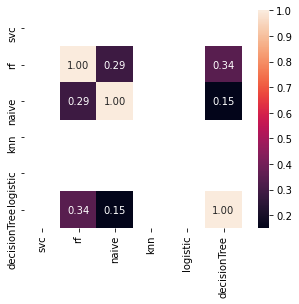

In [163]:
ensemble=pd.DataFrame({'svc':models_svc[2].predict(X_test),
                       'rf':models_rf[2].predict(X_test),
                       'naive':models_naive[2].predict(X_test),
                       'knn':models_knn[2].predict(X_test),
                       'logistic':models_lr[2].predict(X_test),
                       'decisionTree':models_dt[2].predict(X_test)})
# 왜 안나오는지?
sns.heatmap(ensemble.corr(),annot=True,square=True,fmt='.2f')

In [168]:
## 제출

submission['OC']=ensemble[['rf','svc','naive','decisionTree']].all(axis=1).astype(int)
# submission.to_csv('./submission/submission_ensemble_2020_12_21(2).csv',index=False)

### 특성 평가

#### 1. shap
#### 2. randomforest feature importance

In [155]:
fi=pd.DataFrame({
    'feature':X_train.columns,
    'importances':models_rf[2].feature_importances_
}).sort_values(by='importances',ascending=True)

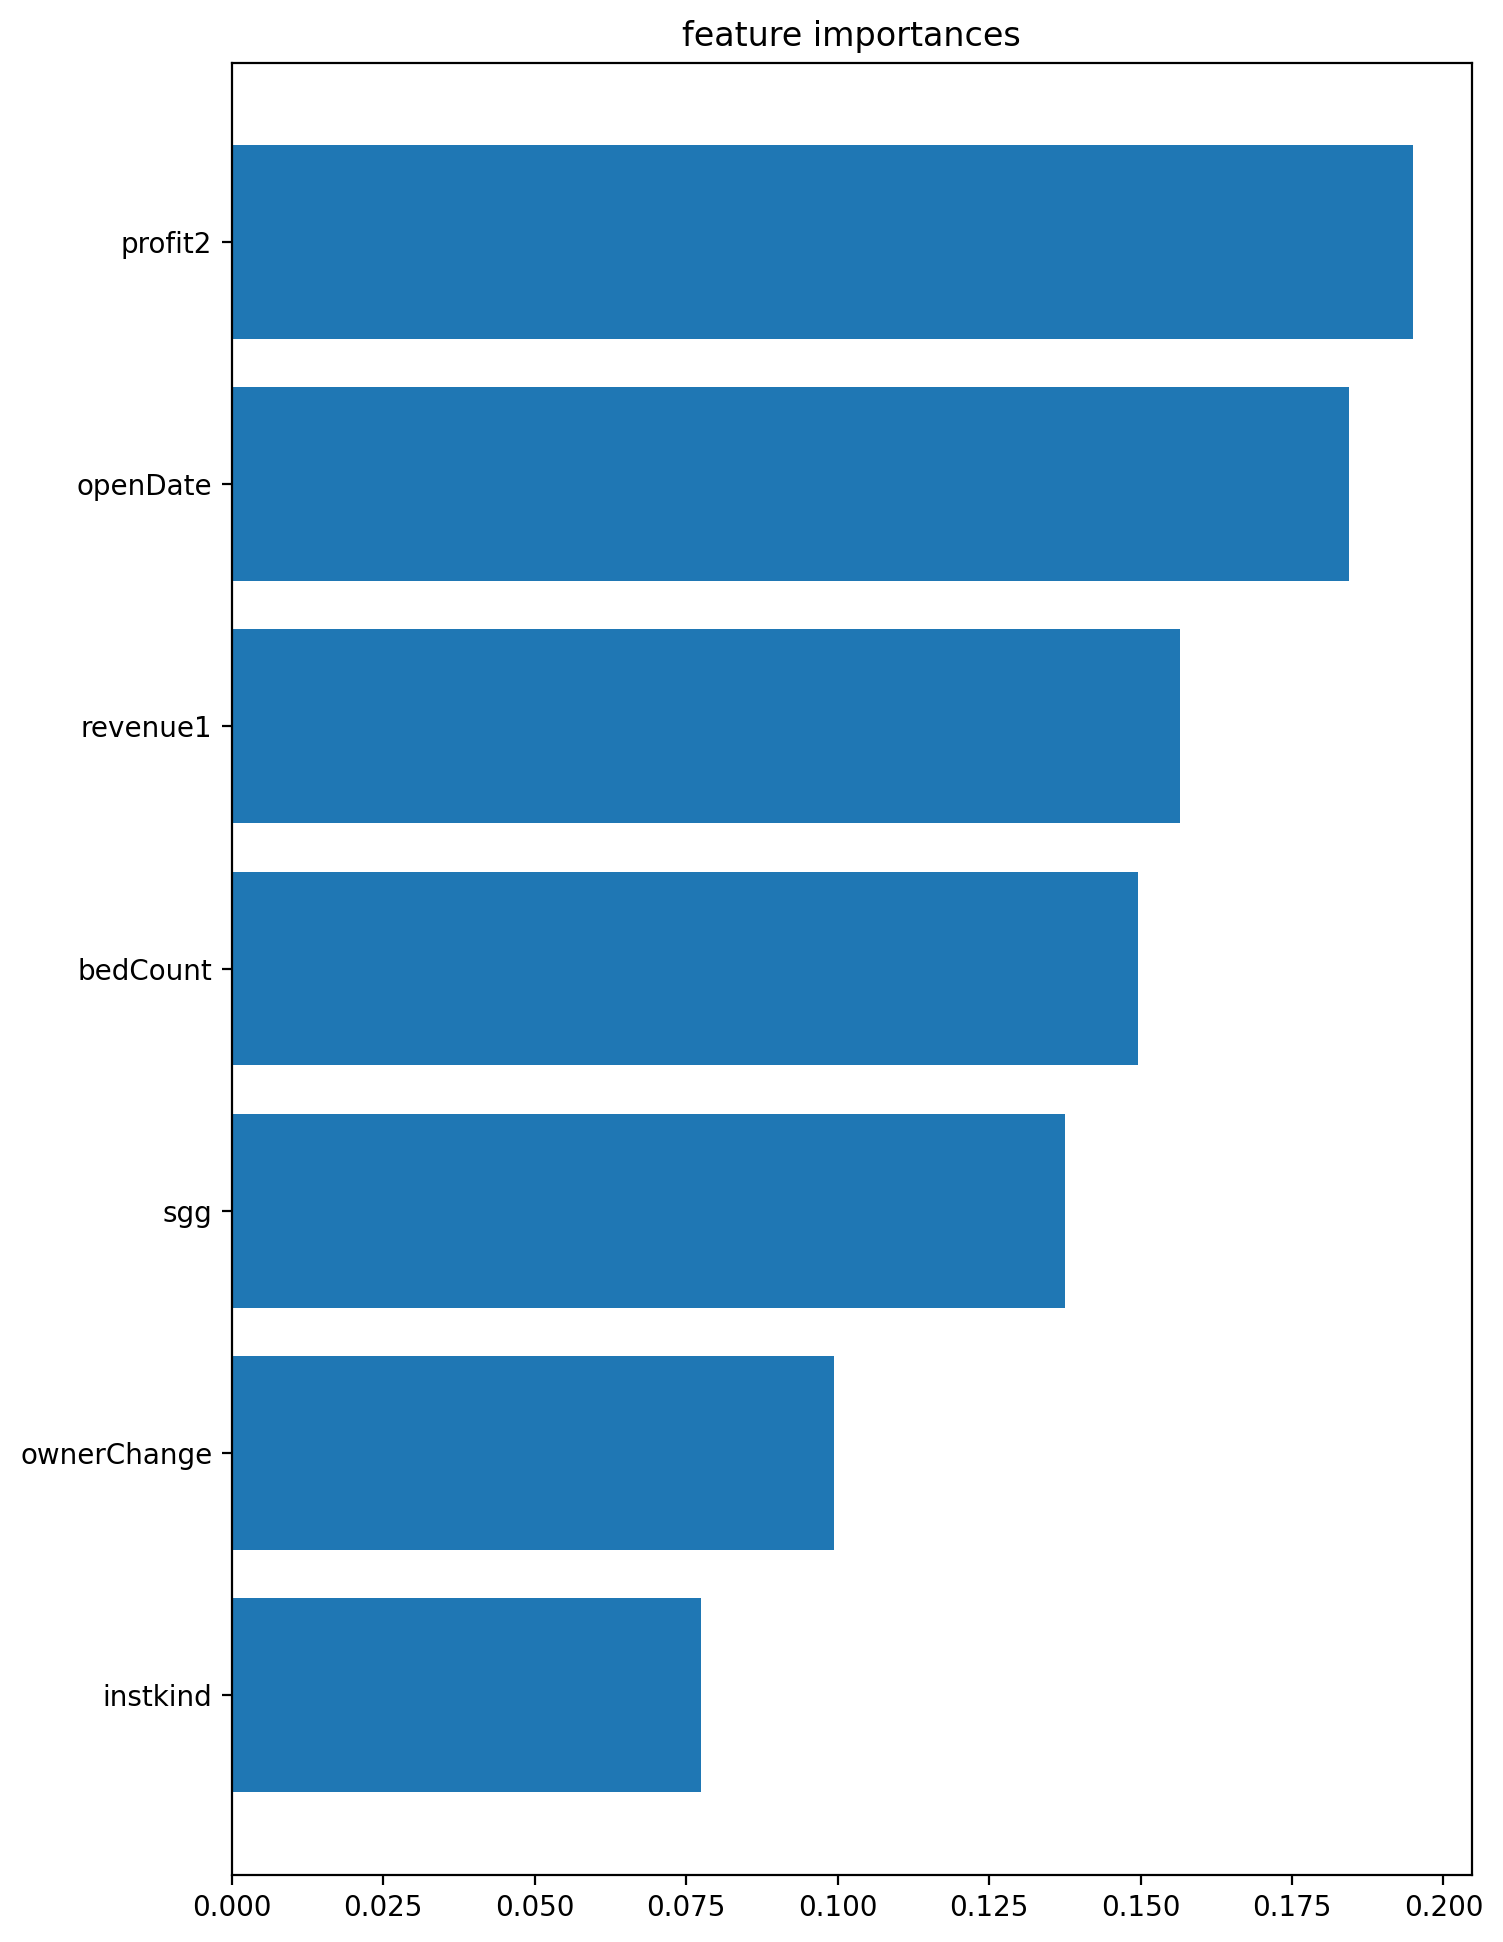

In [156]:
fig,ax=plt.subplots(1,1,figsize=(8,12),dpi=200)
ax.barh(y=fi.feature,width=fi.importances)
ax.set_title("feature importances")
plt.show()

In [157]:
# import shap
# from alibi.explainers import KernelShap

# shap.initjs()

In [158]:
# shap 따라하기.
# https://docs.seldon.io/projects/alibi/en/stable/examples/kernel_shap_wine_intro.html

# pred_func=models[2].decision_function
# svm_explainer=KernelShap(pred_func)
# svm_explainer.fit(X_tr_copy)

In [159]:
# shap 설명.
# 0 클래스밖에 못읽는다. 데이터가 적기때문ㅇ? 아니면 target이 1이 많아서? 

# 시간이 걸린다. 6분
# svm_explanation=svm_explainer.explain(X_val_copy, l1_reg=False)
# len(svm_explanation.shap_values)

[다시시작](#goback)

일단 inventoryAsset, employee1, shortLoan1, sga1, shortLoan2, longLoan2, surplus2, surplus1, employee2 부터.  
shap.summary_plot(svm_explanation.shap_values,X_val_copy,X_train.columns)

In [160]:
# pred=models[2].predict(X_test)

In [161]:
submission['OC']=pred
submission.OC.value_counts()

ValueError: Length of values (58) does not match length of index (127)

In [ ]:
# submission.to_csv('./submission/submission_SVM(linear)_models[2]_2020_12_18.csv',index=False)

In [ ]:
# submission.to_csv('./submission/submission_SVM(linear)_models[4].csv',index=False)